In [1]:
import pandas as pd
import pickle
import shap
import matplotlib.pyplot as plt
from RandomForest import RandomForestModel
from sklearn.model_selection import train_test_split

In [2]:
model = pickle.load(open("model.pkl", "rb"))

Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [3]:
def toDummy(data):
    data = data.drop(["Time", "Date", "Average_Speed", "Vehicle_Count", "Density", "Incident"], axis=1,)
    for col in data.dtypes[data.dtypes == "object"].index:
        for_dummy = data.pop(col)
        data = pd.concat([data, pd.get_dummies(for_dummy, prefix=col)], axis=1)
    return data

In [4]:
train = model.training.copy()
labels = train.pop("Jam")
train = toDummy(train)
seed = 50
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25, random_state=seed)
data = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

plot


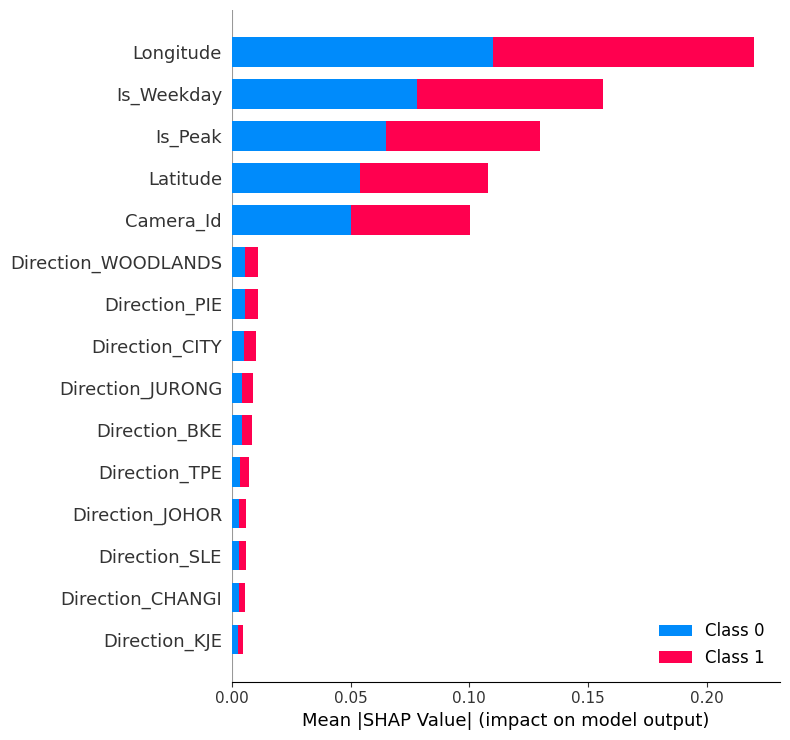

In [5]:
explainer = shap.TreeExplainer(model.model)
shap_values = explainer.shap_values(x_test)
print("plot")
fig = plt.figure()
shap.summary_plot(shap_values, x_test, show=False, max_display = 15) # mean shap
plt.xlabel("Mean |SHAP Value| (impact on model output)")
plt.show()